In [2]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('/Users/andreaberti/Documents/work/DBT/DBT_TCIA/BCS-DBT_boxes-train-v2.csv')

In [4]:
df

,PatientID,StudyUID,View,Subject,Slice,X,Y,Width,Height,Class,AD,VolumeSlices
0,DBT-P00013,DBT-S00163,rmlo,0,16,1116,1724,218,105,benign,0,49
1,DBT-P00024,DBT-S03255,lcc,0,19,267,488,64,64,benign,0,73
2,DBT-P00024,DBT-S03255,lcc,0,37,169,384,93,85,benign,0,73
3,DBT-P00024,DBT-S03255,lmlo,0,11,471,1060,67,56,benign,0,81
4,DBT-P00024,DBT-S03255,lmlo,0,12,640,673,93,80,benign,0,81
...,...,...,...,...,...,...,...,...,...,...,...,...
219,DBT-P05030,DBT-S05569,rmlo,2,24,1465,624,84,115,cancer,0,74
220,DBT-P05047,DBT-S05588,rcc,0,41,1341,1073,387,499,benign,1,78
221,DBT-P05047,DBT-S05588,rmlo,0,41,1192,1019,456,541,benign,1,76
222,DBT-P05056,DBT-S01839,rcc,0,44,1642,661,245,392,cancer,1,72


# Analysis of the x-y dimentions of the masses

In [17]:
width = df['Width']
height = df['Height']
max_dim = np.maximum(width, height)

In [18]:
threshold = 224
width_lt_224 = width[width < threshold]
height_lt_224 = height[height < threshold]
max_dim_lt_224 = max_dim[max_dim < threshold]

In [23]:
print(f'The number of masses is {np.size(max_dim)}')
print(20*'*')
print(f'The number of masses with WIDTH smaller than {threshold} is {np.size(width_lt_224)}')
print(20*'*')
print(f'The number of masses with HEIGHT smaller than {threshold} is {np.size(height_lt_224)}')
print(20*'*')
print(f'The number of masses with MAX DIMENTION smaller than {threshold} is {np.size(max_dim_lt_224)} (square crop)')


The number of masses is 224
********************
The number of masses with WIDTH smaller than 224 is 118
********************
The number of masses with HEIGHT smaller than 224 is 125
********************
The number of masses with MAX DIMENTION smaller than 224 is 98 (square crop)


In [70]:
def plot_hist(arr, title_arg, threshold=224, edge_min=54, edge_max=800, step=10):
    n = plt.hist(arr, bins=np.arange(edge_min, edge_max+1, step=step))
    plt.vlines(x=threshold, ymin=0, ymax=np.amax(n[0]), colors='r')
    plt.title(f'Distribution of {title_arg}')

In [69]:
def plot_hist_num(arr, title_arg, threshold=224, edge_min=54, edge_max=800, step=10):
    counts, edges, bars =  plt.hist(arr, bins=np.arange(edge_min, edge_max+1, step=step))
    plt.bar_label(bars)
    plt.vlines(x=threshold, ymin=0, ymax=np.amax(counts), colors='r')
    plt.title(f'Distribution of {title_arg}')

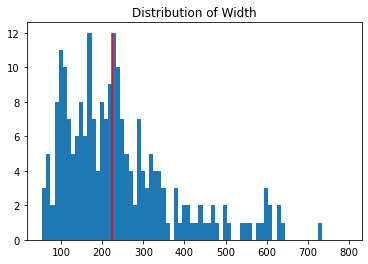

In [71]:
plot_hist(width, title_arg='Width')

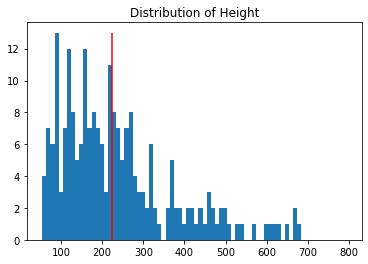

In [48]:
plot_hist(height, title_arg='Height')

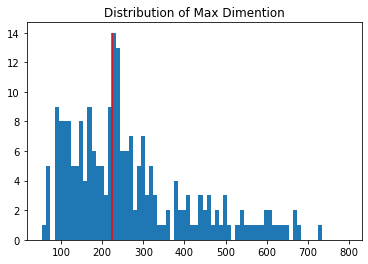

In [49]:
plot_hist(max_dim, title_arg='Max Dimention')

Text(0.5, 1.0, 'Distribution of difference between the two dimentions')

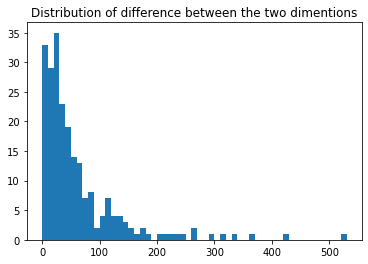

In [58]:
dim_diff = np.abs(width - height)
plt.hist(dim_diff, bins=np.arange(0, np.amax(dim_diff)+10, 10))
plt.title('Distribution of difference between the two dimentions')

Text(0.5, 1.0, 'Distribution of aspect ratios of masses')

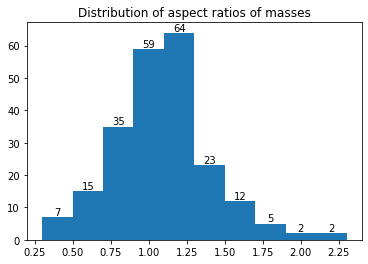

In [65]:
aspect_ratio = width / height
counts, edges, bars = plt.hist(aspect_ratio, bins=np.arange(0.3, np.amax(aspect_ratio) + 0.2, step=0.2))
plt.bar_label(bars)
plt.title('Distribution of aspect ratios of masses')

Text(0.5, 1.0, 'Distribution of the difference between the two dimentions\nover the min dimention')

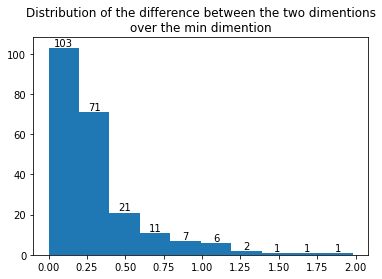

In [73]:
diff_over_min = dim_diff / np.minimum(width, height)
counts, edges, bars = plt.hist(diff_over_min)
plt.bar_label(bars)
plt.title('Distribution of the difference between the two dimentions\nover the min dimention')

# Analisis of the number of slices of the masses

In [82]:
depth = df['VolumeSlices']
depth_benign = df[df['Class'] == 'benign']['VolumeSlices']
depth_cancer = df[df['Class'] == 'cancer']['VolumeSlices']

Text(0.5, 1.0, 'Distribution of number of slices')

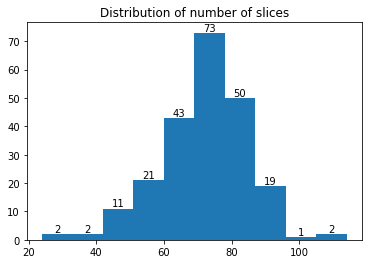

In [85]:
counts, edges, bars = plt.hist(depth)
plt.bar_label(bars)
plt.title('Distribution of number of slices')

Text(0.5, 1.0, 'Distribution of number of slices\nbenign masses')

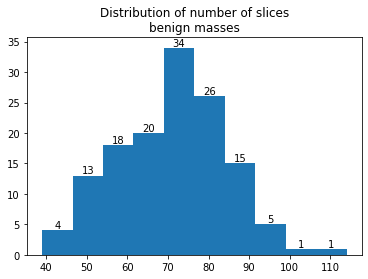

In [86]:
counts, edges, bars = plt.hist(depth_benign)
plt.bar_label(bars)
plt.title('Distribution of number of slices\nbenign masses')

Text(0.5, 1.0, 'Distribution of number of slices\nmalignant masses')

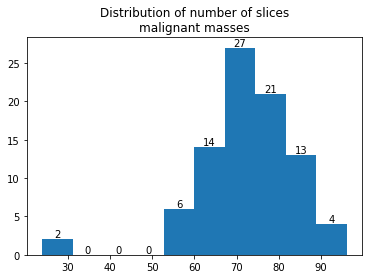

In [87]:
counts, edges, bars = plt.hist(depth_cancer)
plt.bar_label(bars)
plt.title('Distribution of number of slices\nmalignant masses')

In [88]:
np.amin(depth_cancer)

24